# Face Filter Project Using Computer Vision

In [1]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# Using cascade classifier and loads nose xml file to identify nose points
nose_cascade = cv2.CascadeClassifier('Snapchat Filter/Nose18x15.xml')

In [3]:
# Using cascade classifier and loads eyes xml file to identify eyes points
eyes_cascade = cv2.CascadeClassifier('Snapchat Filter/frontalEyes35x16.xml')

In [4]:
# input image
img = plt.imread('Snapchat Filter/shubham_before.jpg')
img1 = img.copy()

<h3>Image Before Filter</h3?

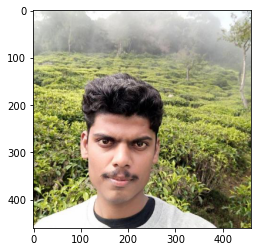

In [5]:
# display image
plt.imshow(img)

In [6]:
img.shape

(460, 460, 3)

In [7]:
# Co-ordinates where eyes are detected
eye = eyes_cascade.detectMultiScale(img)[0]
print(eye)

[128 257 120  55]


In [8]:
eye_x, eye_y, eye_w, eye_h = eye

In [9]:
# Co-ordinates where nose is detected
nose = nose_cascade.detectMultiScale(img, 1.5)[0]
print(nose)

[156 296  61  51]


In [10]:
nose_x, nose_y, nose_w, nose_h = nose

<h5> Draw the rectangle on the detected part of the face </h5>

In [11]:
# detecting & drawing the rectangle on eyes portion
img_detect = cv2.rectangle(img, (eye_x, eye_y), (eye_x + eye_w, eye_y + eye_h), (255, 255, 0), 3)

In [12]:
# detecting & drawing the rectangle on nose portion
img_detect = cv2.rectangle(img, (nose_x, nose_y), (nose_x + nose_w, nose_y + nose_h), (255, 255, 0), 3)

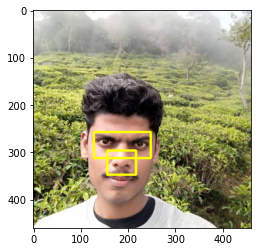

In [13]:
plt.imshow(img_detect)

<h5> Filter the image </h5>

In [27]:
moustach = plt.imread('Snapchat Filter/mustache.png')
glasses = plt.imread('Snapchat Filter/glasses.png')

In [15]:
glasses.shape

(221, 483, 4)

In [16]:
# Resize the glasses at the frontal eye section
glasses = cv2.resize(glasses, (eye_w, eye_h))

In [17]:
img = img.copy()

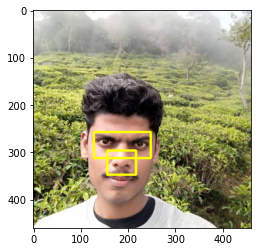

In [18]:
plt.imshow(img)

In [19]:
for i in range(glasses.shape[0]):
    for j in range(glasses.shape[1]):
        if glasses[i, j, 3] > 0:
            img1[eye_y + i, eye_x + j, :] = glasses[i, j, :-1]

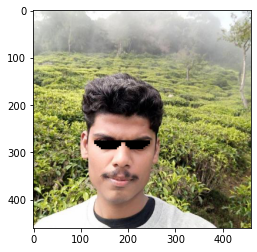

In [20]:
plt.imshow(img1)

In [21]:
moustach.shape

(320, 640, 4)

In [22]:
moustach = cv2.resize(moustach, (nose_w, nose_h))

In [23]:
for i in range(moustach.shape[0]):
    for j in range(moustach.shape[1]):
        if moustach[i, j, 3] > 0:
            img1[nose_y + i + 23, nose_x + j, :] = moustach[i, j, :-1]

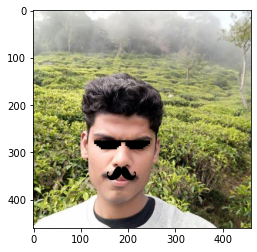

In [24]:
plt.imshow(img1)